In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy import integrate

%matplotlib notebook



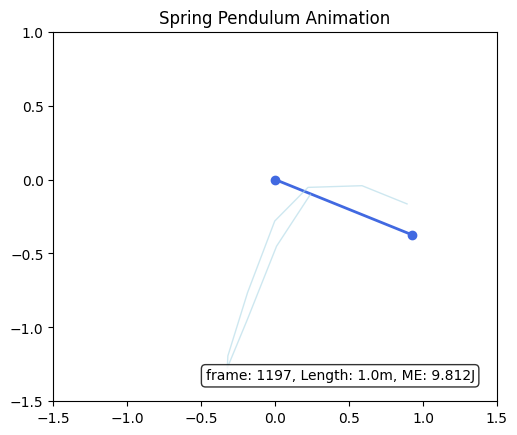

In [21]:
#Spring Pendulum + SciPy playbox

#Surprisingly easy to go from the Lagrangian straight to ODE and solve them
def ODE(x, t, g, k, m, L):
    x1dot = x[1]
    x2dot = (L + x[0]) * (x[3])**2 + g * np.cos(x[2]) - k * x[0] / m 
    y1dot = x[3]
    y2dot = -g * np.sin(x[2]) / (L + x[0]) - 2 * x[1] * x[3] / (L + x[0])
    return [x1dot, x2dot, y1dot, y2dot]

x0 = [0, 0, np.pi, 0.1]
g = 9.81
k = 100
m = 2
L = .5

timePoints=np.linspace(0,1200,10000) #One minute, 1000 samples

sol = integrate.odeint(ODE, x0, timePoints, args=(g, k, m, L))

#Here, the anima-fun begins !!

#Angular to Cartesion conversion
x = (L+sol[:, 0]) * np.sin(sol[:, 2])
y = -(L+sol[:, 0]) * np.cos(sol[:, 2])

#Painful figure setting
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.set_xlim(-L - 1, L + 1)
ax.set_ylim(-L - 1, 1)
ax.set_title("Spring Pendulum Animation")

#Essentially initial conditions for the animation
(line,) = ax.plot([0, x[0]], [0, y[0]], 'o-', lw=2, color='royalblue')  # string
(trail,) = ax.plot([], [], '-', lw=1, color='lightblue', alpha=0.6)  # the shadow line
frame_text = ax.text(
    0.95, 0.05, "", transform=ax.transAxes, fontsize=10,
    verticalalignment='bottom', horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
)

trail_length = 10  # number of frames for visible trail

#Uses a formula to generate the n'th frame
def update(i):
    line.set_data([0, x[i]], [0, y[i]])
    # mgh + .5*m*rdot^2 + .5*I*w^2 + .5*k*x^2
    energy = m * g * y[i] + 0.5 * m * (sol[i][1])**2 + 0.5 * m * (L+sol[i][0])**2 * sol[i][3]**2 + 0.5 * k * sol[i][0]**2
    frame_text.set_text(f"frame: {i}, Length: {np.round(L+sol[i][0], 2)}m, ME: {np.round(energy, 3)}J")
    start = max(i - trail_length, 0)
    trail.set_data(x[start:i], y[start:i])

    return (line, trail)

#This is the part that takes time
#300 frames covering 60 seconds of motion; 5 frames cover 1 second of motion
ani = animation.FuncAnimation(fig, update, frames=range(900, 1200, 3), blit= True, repeat=True, interval=30)

HTML(ani.to_jshtml())






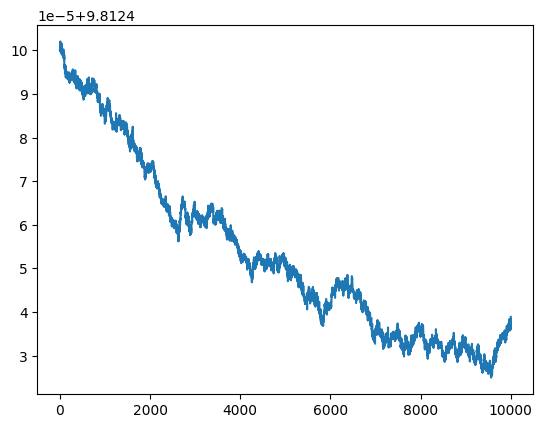

In [20]:
#Not sure what this is ^^

%matplotlib inline

GPE = -1 * m * g * (L+sol[:, 0])*np.cos(sol[:, 2])
#     -1  mass * gravity * height
TKE = 0.5 * m * (sol[:, 1])**2
#    1/2 * mass * r_dot**2
RKE = 0.5 * m * (L+sol[:, 0])**2 * sol[:, 3]**2
#   1/2   * mass * inertia      * omega **2
SPE = 0.5 * k * sol[:, 0]**2
#   .5   * spring constant * displacement squared
energy = GPE + TKE + RKE + SPE

plt.plot(energy)




1. It is much more efficient to use SciPy that to implement a naive differential equation solver
2. SciPi is faster and more stable; my naive implementation did not feature constant ME. The system exploded and the spring pendulum flew to the moon. 
3. The matrix representation of DE's makes SciPi much easier to understand. 
4. Animation will take the longest time out of anything. 
5. I'm not sure why the energy is decreasing like this. It should be constant. 
    5a: I don't know why the in situ ME calculated and the net ME calculated don't allign.
